# Prediksi Harga Berlian

## Data preparation (EDA)


### Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Menampilkan data

In [2]:
df = pd.read_csv('data/berlian.csv')

print(f"Ukuran dataset: {df.shape}")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Ukuran dataset: (40455, 11)
Jumlah baris: 40455
Jumlah kolom: 11


In [ ]:
#Buat codingan tampilkan data data teratas
df.head()

,Unnamed: 0,carat,potongan,warna,kejernihan,kedalaman,lebar,x,y,z,harga
0,11765,1.10,b'Ideal',b'E',b'SI2',61.6,56.0,6.61,6.64,4.08,76230000
1,41579,0.44,b'Premium',b'E',b'VS1',60.7,58.0,4.91,4.88,2.97,18570000
2,14695,1.00,b'Very Good',b'F',b'VS2',62.9,59.0,6.30,6.33,3.97,88935000
3,43139,0.58,b'Good',b'G',b'SI1',63.8,56.0,5.30,5.33,3.39,20820000
4,28899,0.30,b'Ideal',b'G',b'VVS2',61.5,57.0,4.29,4.33,2.65,10260000


In [4]:
#Buat codingan tampilkan data data terbawah
df.tail()

,Unnamed: 0,carat,potongan,warna,kejernihan,kedalaman,lebar,x,y,z,harga
40450,44034,0.42,b'Ideal',b'D',b'VVS1',61.6,56.0,4.79,4.82,2.96,23205000
40451,45843,0.50,b'Good',b'G',b'VVS2',63.9,58.0,5.00,5.05,3.21,25725000
40452,31074,0.30,b'Good',b'F',b'VVS1',63.7,59.0,4.17,4.24,2.68,11280000
40453,26626,2.07,b'Premium',b'I',b'SI1',62.9,59.0,8.15,NaN,5.11,245880000
40454,17327,1.09,b'Premium',b'G',b'VS1',62.5,59.0,6.57,6.54,4.10,104265000


### Menampilkan informasi data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40455 non-null  int64  
 1   carat       40455 non-null  float64
 2   potongan    40455 non-null  object 
 3   warna       40081 non-null  object 
 4   kejernihan  40455 non-null  object 
 5   kedalaman   40455 non-null  float64
 6   lebar       40455 non-null  float64
 7   x           39248 non-null  float64
 8   y           39174 non-null  float64
 9   z           39200 non-null  float64
 10  harga       40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


In [6]:
#tampilkan info data kolom yang missing value dengan value_counts()
df.isnull().sum()

Unnamed: 0       0
carat            0
potongan         0
warna          374
kejernihan       0
kedalaman        0
lebar            0
x             1207
y             1281
z             1255
harga            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40455 non-null  int64  
 1   carat       40455 non-null  float64
 2   potongan    40455 non-null  object 
 3   warna       40081 non-null  object 
 4   kejernihan  40455 non-null  object 
 5   kedalaman   40455 non-null  float64
 6   lebar       40455 non-null  float64
 7   x           39248 non-null  float64
 8   y           39174 non-null  float64
 9   z           39200 non-null  float64
 10  harga       40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


In [8]:
#tampilkan tipe data dari semua kolom pada dataset
df.dtypes

Unnamed: 0      int64
carat         float64
potongan       object
warna          object
kejernihan     object
kedalaman     float64
lebar         float64
x             float64
y             float64
z             float64
harga           int64
dtype: object

Text(0.5, 1.0, 'type of our data ')

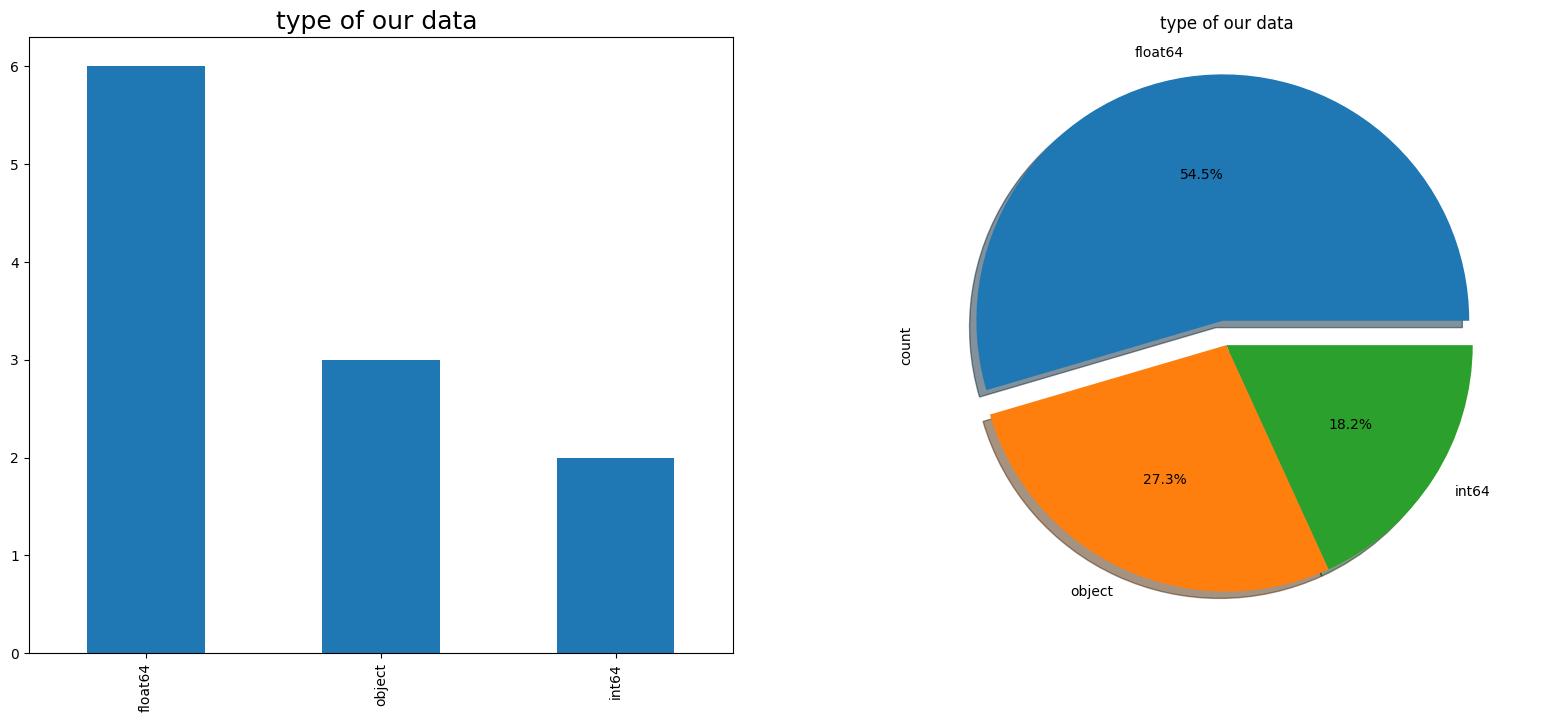

In [9]:
# Buat GRAFIK PERBANDINGAN TIPE DATA
fig, axarr = plt.subplots(1, 2, figsize=(20, 8))

df.dtypes.value_counts().plot.pie(explode=[0.1,0,0],autopct='%1.1f%%',shadow=True,ax=axarr[1])
axarr[1].set_title("type of our data ", fontsize=18)

df.dtypes.value_counts().plot(kind='bar',ax=axarr[0])
plt.title('type of our data');
axarr[0].set_title("type of our data ", fontsize=18)

In [10]:
df.describe()

,Unnamed: 0,carat,kedalaman,lebar,x,y,z,harga
count,40455.000000,40455.000000,40455.000000,40455.000000,39248.000000,39174.000000,39200.000000,4.045500e+04
mean,26960.177308,0.796621,61.750478,57.445500,5.728911,5.731373,3.537118,5.893245e+07
std,15561.990558,0.472573,1.430166,2.217101,1.120201,1.143258,0.709884,5.982044e+07
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,4.890000e+06
25%,13444.500000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,1.423500e+07
50%,26957.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.520000,3.595500e+07
75%,40455.500000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,7.965000e+07
max,53939.000000,4.010000,78.200000,79.000000,10.140000,58.900000,31.800000,2.823450e+08


### Numerikal

In [11]:
# MENCARI VARIABEL NUMERIKAL
numerical_features = df.select_dtypes(include=[np.number])
print(f"Jumlah variabel numerikal: {numerical_features.shape[1]}")
numerical_features.columns


Jumlah variabel numerikal: 8


Index(['Unnamed: 0', 'carat', 'kedalaman', 'lebar', 'x', 'y', 'z', 'harga'], dtype='object')

### Kategorikal

In [12]:
# MENCARI VARIABEL KATEGORIKAL
categorical_features = df.select_dtypes(include=[object])
print(f"Jumlah variabel kategorikal: {categorical_features.shape[1]}")
categorical_features.columns


Jumlah variabel kategorikal: 3


Index(['potongan', 'warna', 'kejernihan'], dtype='object')

### Nilai unik

In [13]:
#Tampilkan jumlah nilai unik dari semua kolom pada dataset
df.nunique()

Unnamed: 0    40455
carat           265
potongan          5
warna             7
kejernihan        8
kedalaman       177
lebar           116
x               542
y               539
z               365
harga         10397
dtype: int64

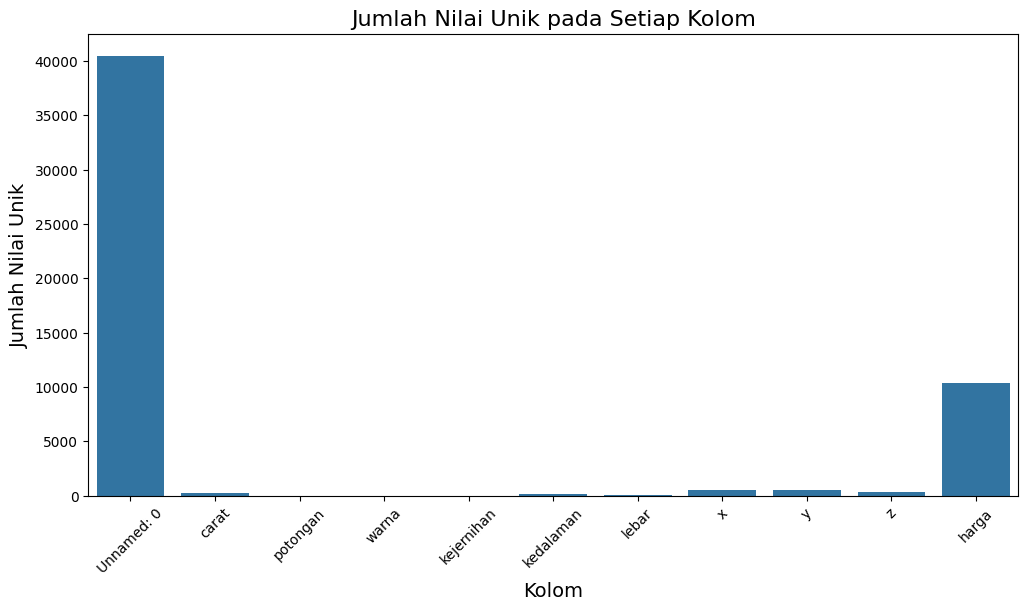

In [14]:
#Visualisasi Nilai unik
plt.figure(figsize=(12,6))
sns.barplot(x=df.nunique().index, y=df.nunique().values)
plt.title('Jumlah Nilai Unik pada Setiap Kolom', fontsize=16)
plt.xlabel('Kolom', fontsize=14)
plt.ylabel('Jumlah Nilai Unik', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Missing value

In [15]:
#Cari missing value pada semua kolom di dataset dengan isnull()
df.isnull().sum()

Unnamed: 0       0
carat            0
potongan         0
warna          374
kejernihan       0
kedalaman        0
lebar            0
x             1207
y             1281
z             1255
harga            0
dtype: int64

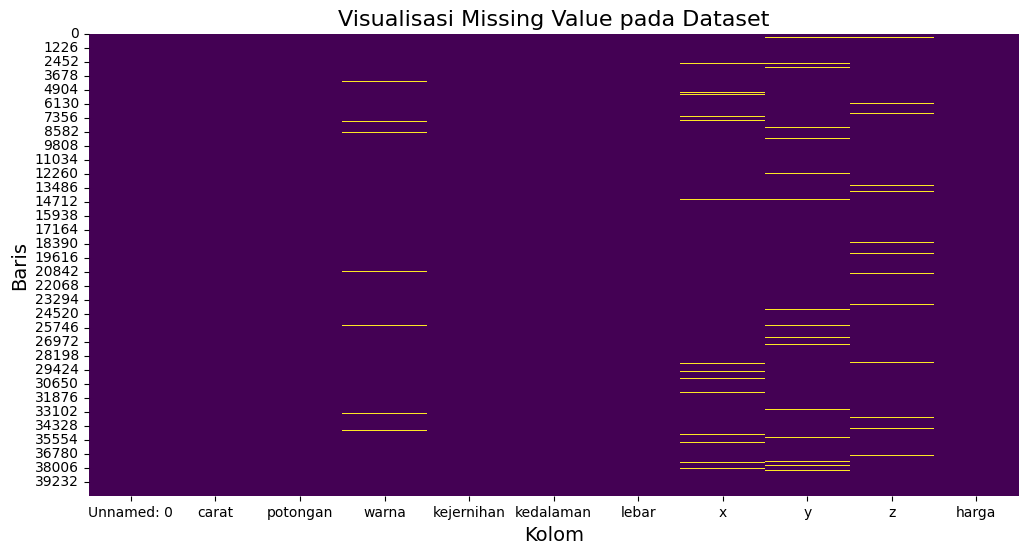

In [16]:
#Visualisasi Missing value
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualisasi Missing Value pada Dataset', fontsize=16)
plt.xlabel('Kolom', fontsize=14)
plt.ylabel('Baris', fontsize=14)
plt.show()

### Histogram

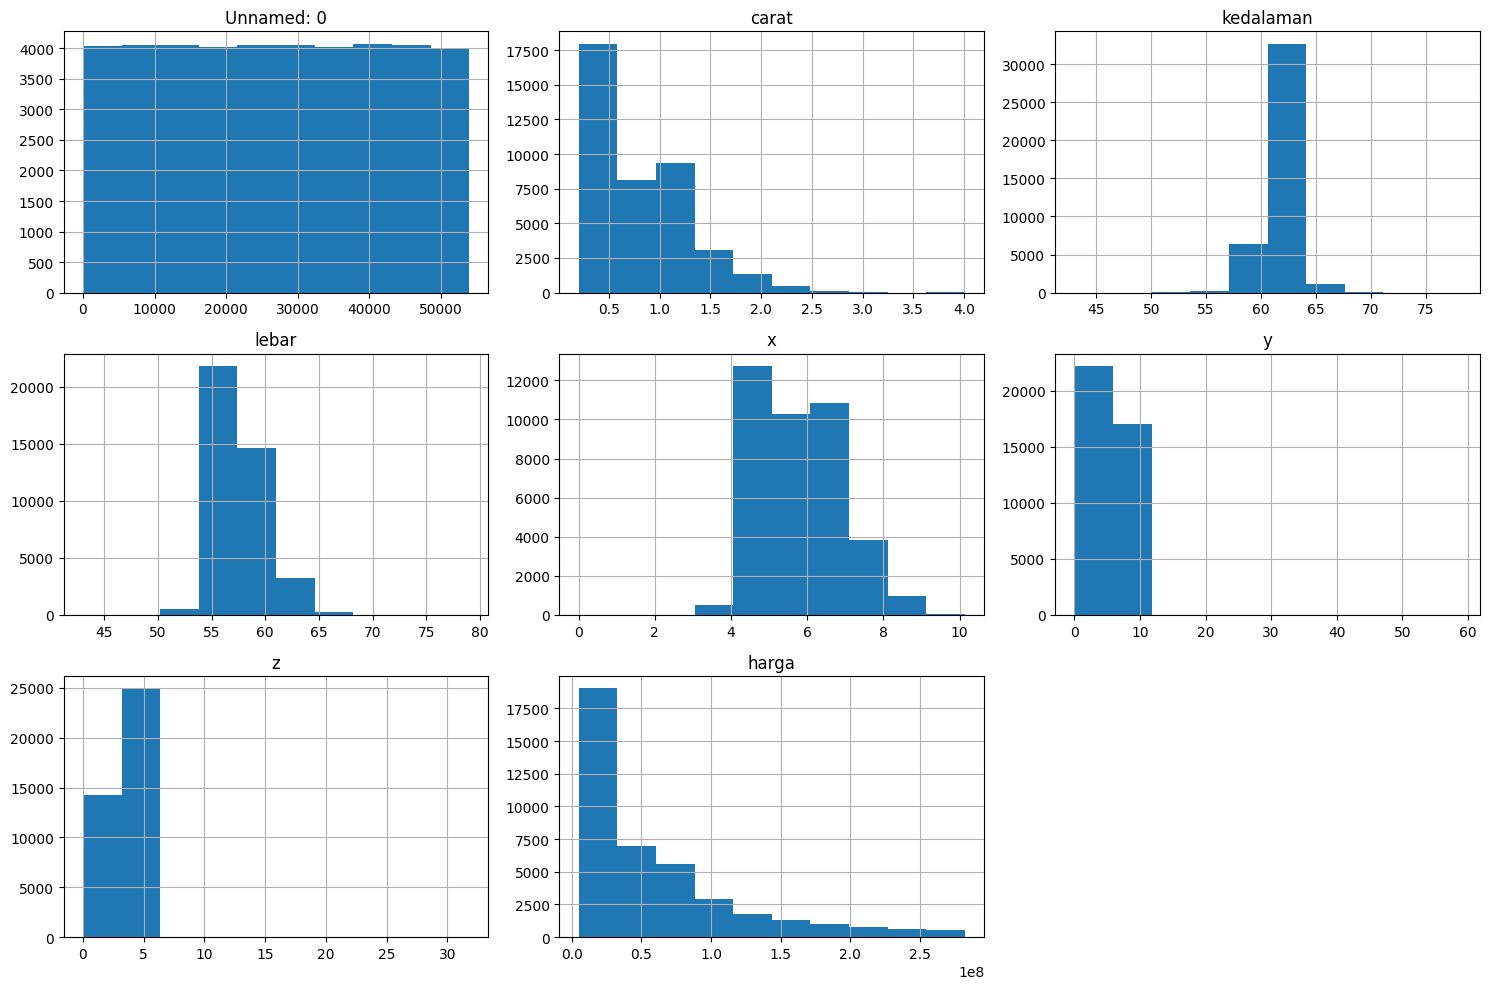

In [17]:
#Menampilkan histogram data atau persebaran data dari semua kolom pada dataset
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

### Outlier

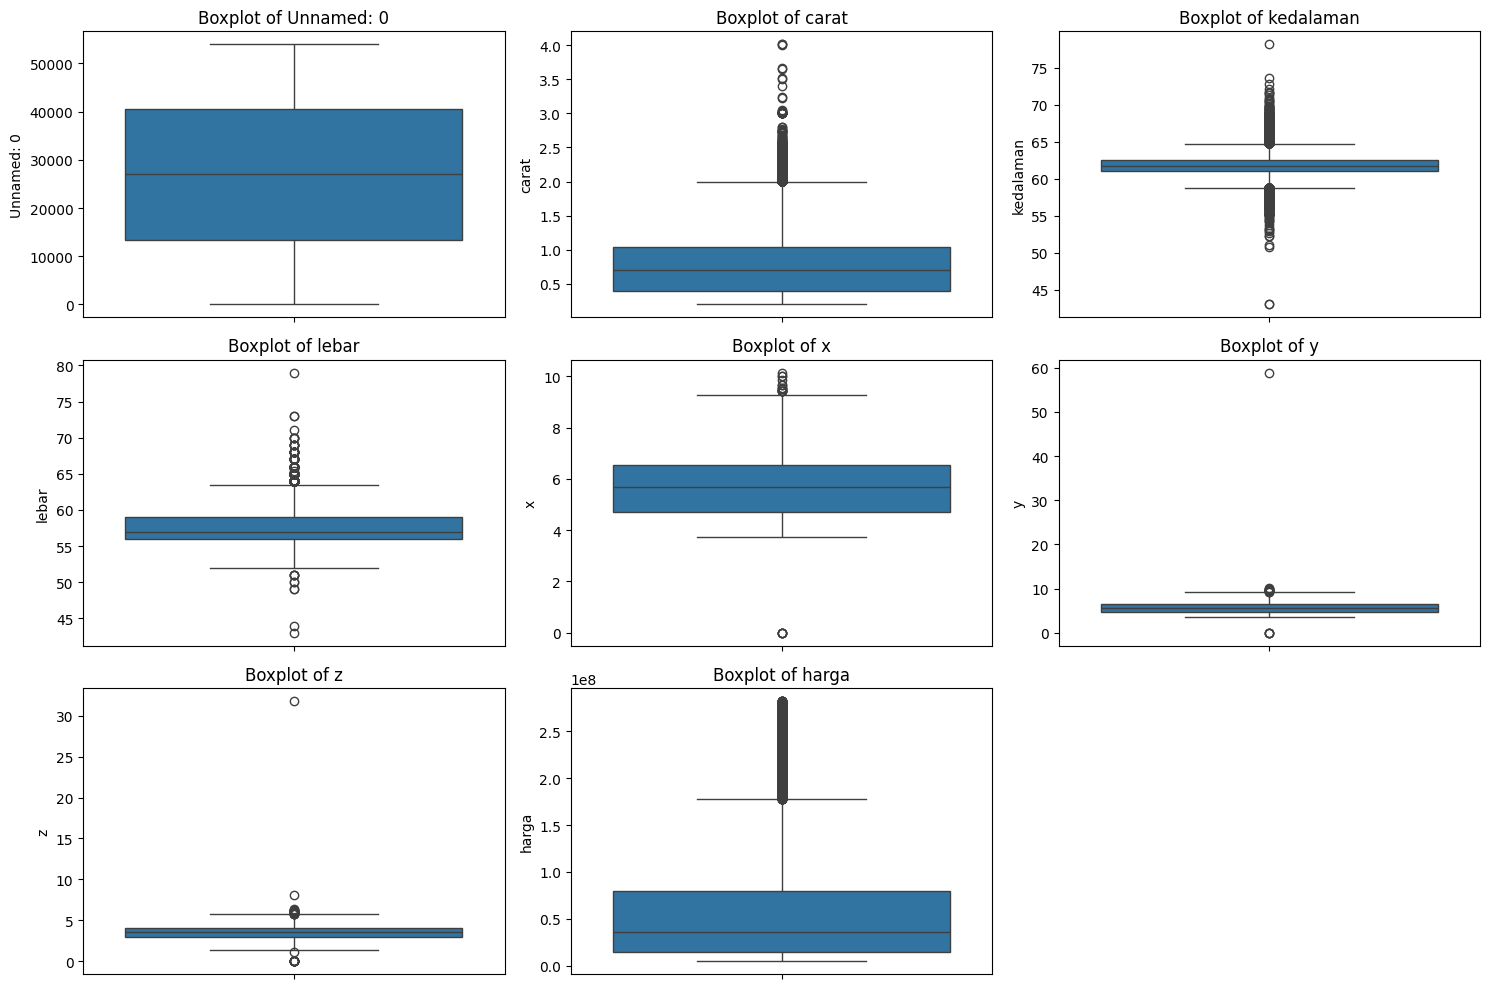

In [18]:
#Menampilkan outliers dalam bentuk grafik (Buat plot boxplot untuk melihat outlier dari semua kolom pada dataset)
plt.figure(figsize=(15,10))
for i, column in enumerate(numerical_features.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


### Korelasi

In [19]:
#cari nilai korelasi dengan fungsi .corr()
correlation = numerical_features.corr()
correlation

,Unnamed: 0,carat,kedalaman,lebar,x,y,z,harga
Unnamed: 0,1.000000,-0.379342,-0.034434,-0.103152,-0.406459,-0.396908,-0.397186,-0.307123
carat,-0.379342,1.000000,0.031192,0.178222,0.975510,0.950619,0.947513,0.921537
kedalaman,-0.034434,0.031192,1.000000,-0.303186,-0.020826,-0.025210,0.099411,-0.005717
lebar,-0.103152,0.178222,-0.303186,1.000000,0.189438,0.181304,0.144743,0.123910
x,-0.406459,0.975510,-0.020826,0.189438,1.000000,0.971998,0.963694,0.883758
y,-0.396908,0.950619,-0.025210,0.181304,0.971998,1.000000,0.942681,0.863191
z,-0.397186,0.947513,0.099411,0.144743,0.963694,0.942681,1.000000,0.855528
harga,-0.307123,0.921537,-0.005717,0.123910,0.883758,0.863191,0.855528,1.000000


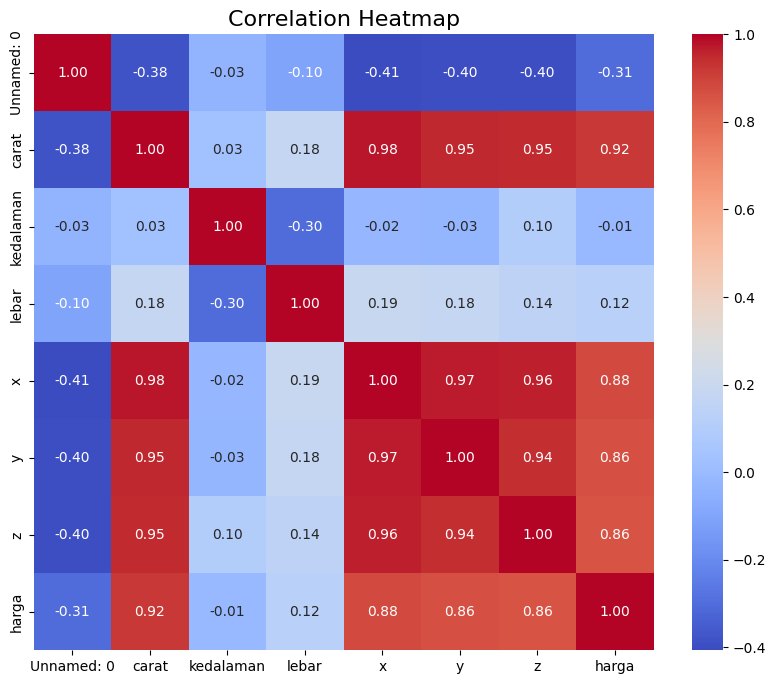

In [20]:
#Visualisasikan dataset dengan fungsi seaborn .heatmap() untuk melihat nilai korelasi
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Data Preproccesing

Encoding

In [21]:
# ENCODING DATA KATEGORIKAL MENJADI NUMERIKAL
label_encoder = LabelEncoder()
df['potongan'] = label_encoder.fit_transform(df['potongan'])
df['warna'] = label_encoder.fit_transform(df['warna'])
df['kejernihan'] = label_encoder.fit_transform(df['kejernihan'])
label_encoder.classes_
df.head()

,Unnamed: 0,carat,potongan,warna,kejernihan,kedalaman,lebar,x,y,z,harga
0,11765,1.10,2,1,3,61.6,56.0,6.61,6.64,4.08,76230000
1,41579,0.44,3,1,4,60.7,58.0,4.91,4.88,2.97,18570000
2,14695,1.00,4,2,5,62.9,59.0,6.30,6.33,3.97,88935000
3,43139,0.58,1,3,2,63.8,56.0,5.30,5.33,3.39,20820000
4,28899,0.30,2,3,7,61.5,57.0,4.29,4.33,2.65,10260000


Missing Value

In [22]:
# MISSING DATA KOSONG VARIABEL KATEGORIKAL DENGAN NILAI MODUS
df['potongan'].fillna(df['potongan'].mode()[0], inplace=True)
df['warna'].fillna(df['warna'].mode()[0], inplace=True)
df['kejernihan'].fillna(df['kejernihan'].mode()[0], inplace=True)
df.isnull().sum()
df.info()
# MISSING DATA KOSONG VARIABEL NUMERIKAL DENGAN NILAI MEAN
df['x'] = df['x'].fillna(df['x'].mean())
df['y'] = df['y'].fillna(df['y'].mean())
df['z'] = df['z'].fillna(df['z'].mean())
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40455 non-null  int64  
 1   carat       40455 non-null  float64
 2   potongan    40455 non-null  int64  
 3   warna       40455 non-null  int64  
 4   kejernihan  40455 non-null  int64  
 5   kedalaman   40455 non-null  float64
 6   lebar       40455 non-null  float64
 7   x           39248 non-null  float64
 8   y           39174 non-null  float64
 9   z           39200 non-null  float64
 10  harga       40455 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 3.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40455 non-null  int64  
 1   carat       40455 non-null  float64
 2   potongan    40455 non-null  in

C:\Users\User\AppData\Local\Temp\ipykernel_16144\2857163056.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['potongan'].fillna(df['potongan'].mode()[0], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16144\2857163056.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

Outlier

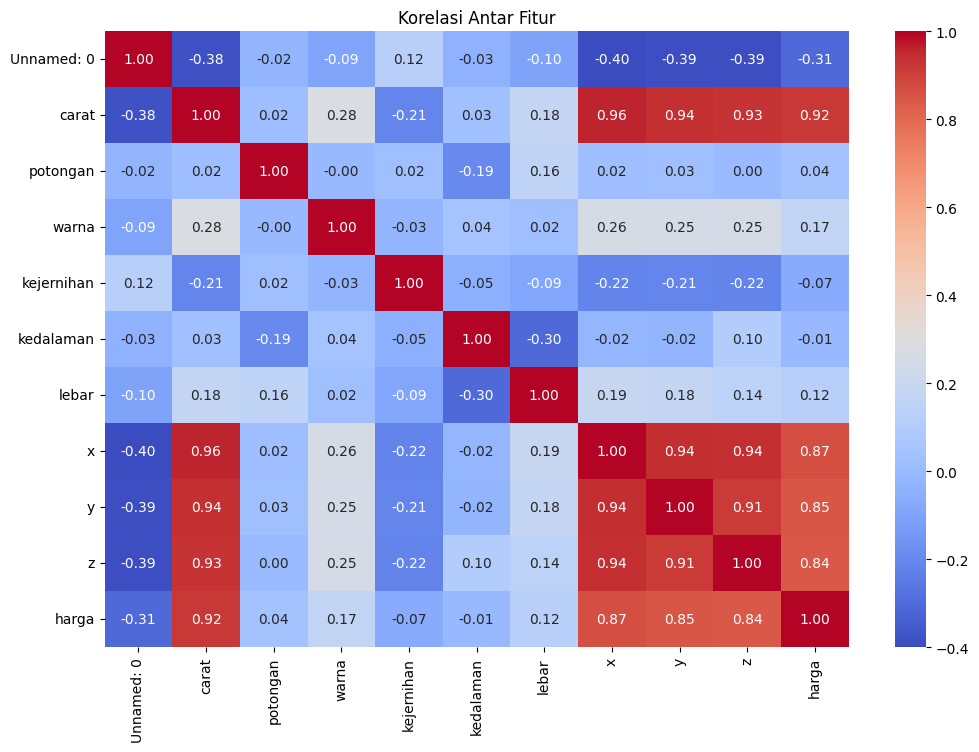

In [23]:
# Ambil semua kolom numerikal
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Hitung korelasi antar kolom numerikal
correlation_matrix = df[numerical_cols].corr()

# Tampilkan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasi Antar Fitur")
plt.show()

In [24]:
df= df.dropna()  # hapus baris kosong
df= df.drop_duplicates()  # hapus duplikat
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")  # rapikan nama kolom

# 3. Simpan hasilnya
df.to_csv("dataset_rapi.csv", index=False)

print("Dataset berhasil dirapikan dan disimpan ke dataset_rapi.csv")

Dataset berhasil dirapikan dan disimpan ke dataset_rapi.csv


In [28]:
print(df.isnull().sum())


unnamed:_0    0
carat         0
potongan      0
warna         0
kejernihan    0
kedalaman     0
lebar         0
x             0
y             0
z             0
harga         0
dtype: int64


In [29]:
print("Jumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 0


In [ ]:
import pandas as pd

# contoh: dataset berlian
df = pd.read_csv("dataset_rapi.csv")

# hitung korelasi
corr = df.corr(numeric_only=True)

print(corr)



            unnamed:_0     carat  potongan     warna  kejernihan  kedalaman  \
unnamed:_0    1.000000 -0.379342 -0.023890 -0.094941    0.120670  -0.034434   
carat        -0.379342  1.000000  0.017034  0.281410   -0.211025   0.031192   
potongan     -0.023890  0.017034  1.000000 -0.004036    0.024333  -0.193972   
warna        -0.094941  0.281410 -0.004036  1.000000   -0.027298   0.044087   
kejernihan    0.120670 -0.211025  0.024333 -0.027298    1.000000  -0.053246   
kedalaman    -0.034434  0.031192 -0.193972  0.044087   -0.053246   1.000000   
lebar        -0.103152  0.178222  0.156171  0.024381   -0.089894  -0.303186   
x            -0.400375  0.960644  0.020074  0.258500   -0.219108  -0.020533   
y            -0.390736  0.935158  0.025715  0.251361   -0.211768  -0.024823   
z            -0.390927  0.933751  0.000323  0.254119   -0.217325   0.097907   
harga        -0.307123  0.921537  0.039935  0.165956   -0.068302  -0.005717   

               lebar         x         y         z 

In [31]:
# Ambil hanya korelasi dengan kolom 'harga'
corr_target = corr["harga"].sort_values(ascending=False)
print("Korelasi terhadap harga:")
print(corr_target)



Korelasi terhadap harga:
harga         1.000000
carat         0.921537
x             0.870697
y             0.848285
z             0.842193
warna         0.165956
lebar         0.123910
potongan      0.039935
kedalaman    -0.005717
kejernihan   -0.068302
unnamed:_0   -0.307123
Name: harga, dtype: float64


In [32]:
threshold = 0.3
selected_features = corr_target[abs(corr_target) >= threshold].index.tolist()

print("\nFitur terpilih berdasarkan korelasi:")
print(selected_features)




Fitur terpilih berdasarkan korelasi:
['harga', 'carat', 'x', 'y', 'z', 'unnamed:_0']


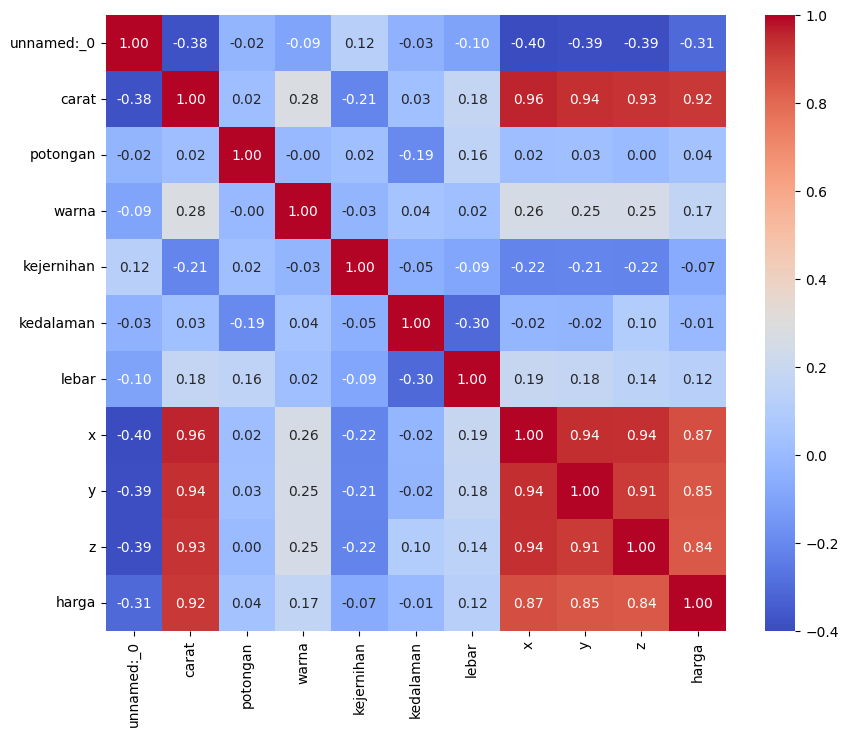

In [33]:


plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()
